# Medir gráfica de barras
**Ricardo Antonio Gutiérrez Esparza** \
**Juan Marquina Cancino**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operadores morfológicos

In [2]:
def Dilation(kernel, img):
    '''Para evitar que se salgan del kernel, agregamos ceros a los bordes'''
    N = img.shape[0]
    M = img.shape[1]

    kN = kernel.shape[0]
    kM = kernel.shape[1]

    kernel = np.array(kernel, dtype=int)
    base = np.count_nonzero(kernel)

    ans = np.zeros(img.shape)*255
    extended = img.copy() 
    extended = np.append(np.append(np.zeros((kN // 2, M)), extended, axis=0), np.zeros((kN // 2, M)), axis=0)
    extended = np.append(np.append(np.zeros((extended.shape[0], kM // 2)), extended, axis=1), np.zeros((extended.shape[0], kM // 2)), axis=1)
    for i in range(0,N):
        for j in range(0, M):
            #print(i, j, i-kN+1, j-kM+1, j+1, kernel.shape)
            imgKern = np.array(extended[i:i + kN, j:j + kM], dtype=int)
            ##imgKern = img[0:5,0:5]
            
            #print(imgKern)
            imgCheck = imgKern + kernel
            imgCheck -= np.ones(imgKern.shape, dtype=int)*255*2
            cc = np.count_nonzero(imgCheck==0)
            if(cc > 0):
                ans[i,j] = 255
            else:
                ans[i,j] = 0
    return ans

In [3]:
def Erosion(kernel, img):
    r''' Los que se salen del kernel, son 0'''
    #print(img.size)
    #print(img)
    N = img.shape[0]
    M = img.shape[1]

    kN = kernel.shape[0]
    kM = kernel.shape[1]

    kernel = np.array(kernel, dtype=int)
    base = np.count_nonzero(kernel)
    #print(base)
    ans = np.zeros(img.shape)
    for i in range(0+kN-1,N):
        for j in range(0+kM-1, M):
            #print(i, j, i-kN+1, j-kM+1, j+1, kernel.shape)
            imgKern = np.array(img[i-kN+1:i+1, j-kM+1:j+1], dtype=int)
            ##imgKern = img[0:5,0:5]
            
            #print(imgKern)
            #print(imgKern)
            imgCheck = imgKern + kernel
            #print(imgCheck)
            imgCheck -= np.ones(imgKern.shape, dtype=int)*255*2
            cc = np.count_nonzero(imgCheck==0)
            #print(imgCheck)
            #return ans
            if(base == cc):
                ans[i-int(kN/2)][j-int(kM/2)] = 255
    return ans


In [4]:
def Open(kernel, img):
    return Dilation(kernel, Erosion(kernel, img))

In [5]:
def Close(kernel, img):
    return Erosion(kernel, Dilation(kernel, img))

## Preprocesar imagen

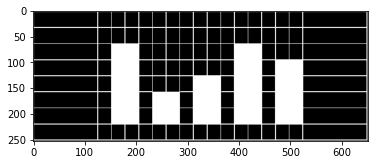

In [6]:
# Obtener imagen binaria
img = cv2.imread('bars.png', cv2.IMREAD_GRAYSCALE)
img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)[1]
img = 255 - img
plt.imshow(img, cmap='gray')

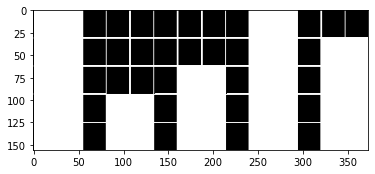

In [7]:
# Recortar imagen
img = img[63:219,151:524]
plt.imshow(img, cmap='gray')
plt.show()

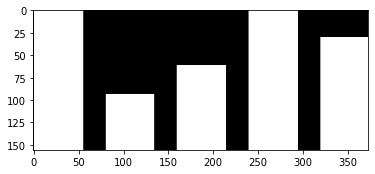

In [8]:
# Eliminar lineas del fondo con un open
kernel = np.ones((5,5))*255
img = Open(kernel, img)
plt.imshow(img, cmap='gray')

## Medir barras

In [9]:
# Iterar con distintos tamaños de kernel y registrar cuando una barra desaparece (y el respectivo tamaño de kernel)
cuts = [60, 140, 230, 300]
ans = [-1] * 5

for i in range(1, img.shape[0] + 2):
    eroded = Erosion(np.ones((i, 1)) * 255, img)
    for idx, (low, high) in enumerate(zip([0] + cuts, cuts + [img.shape[1]])):
        if np.count_nonzero(eroded[:,low:high]) == 0 and ans[idx] == -1:
            ans[idx] = i

In [10]:
print('Mediciones')
for i, val in enumerate(ans):
    print(f'Barra #{i}: {val}')

Mediciones
Barra #0: 157
Barra #1: 63
Barra #2: 95
Barra #3: 157
Barra #4: 126


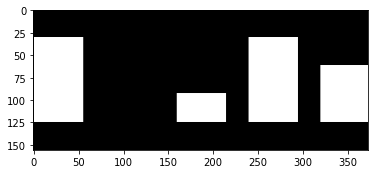

In [11]:
plt.imshow(Erosion(np.ones((63, 1)) * 255, img), cmap='gray')

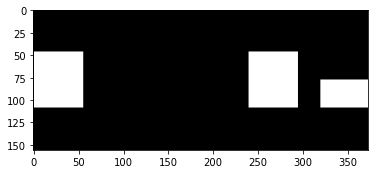

In [12]:
plt.imshow(Erosion(np.ones((95, 1)) * 255, img), cmap='gray')

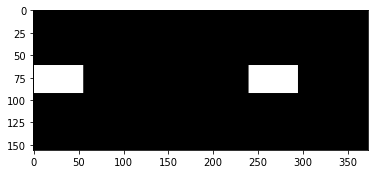

In [13]:
plt.imshow(Erosion(np.ones((126, 1)) * 255, img), cmap='gray')

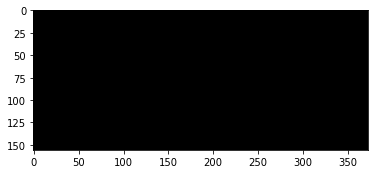

In [14]:
plt.imshow(Erosion(np.ones((157, 1)) * 255, img), cmap='gray')